# HW2: Predicting Patient No-Shows

### Background

You've been hired as the manager of SHMC, a medical center in Brazil. As part of its business model, SHMC usually employs doctors on demand, meaning that doctors are asked to come only when there are appointments. However, once a doctor has been asked to come, you must pay him or her regardless of whether the patient shows up or not. You want to use data on previous appointments to figure out whether you can predict which patients are going to show up, so that you can plan better how many doctors to call.

[The data can be downloaded at this link.](https://drive.google.com/uc?download=export&id=1iM0CSzfNckc565zwpb4VpHjEVLgckLPE)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Loading the data

**1. Load the data referenced by the path above into a pandas data frame. Comment on the total number of rows and columns, and show the first few rows in the dataset.**

In [2]:
#Load the data in a DataFrame
data = pd.read_csv('data/SHMC_NoShows.csv')
data.head(-10)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110512,9.876250e+13,5786368,F,2016-06-08T08:20:01Z,2016-06-08T00:00:00Z,41,MARIA ORTIZ,0,0,0,0,0,0,No
110513,8.674780e+13,5785964,M,2016-06-08T07:52:55Z,2016-06-08T00:00:00Z,2,ANTÔNIO HONÓRIO,0,0,0,0,0,0,No
110514,2.695690e+12,5786567,F,2016-06-08T08:35:31Z,2016-06-08T00:00:00Z,58,MARIA ORTIZ,0,0,0,0,0,0,No
110515,6.456340e+14,5778621,M,2016-06-06T15:58:05Z,2016-06-08T00:00:00Z,33,MARIA ORTIZ,0,1,0,0,0,0,Yes


In [3]:
#Total number of row and column
print(data.shape)

(110527, 14)


Here's a brief summary of the features in the data:

1. PatientId - Identification of a patient.
2. AppointmentID - Identification of each appointment.
3. Gender - Male or female.
4. ScheduledDay - The day someone called or registered the appointment.
6. AppointmentDay - The day of the actual appointment, when the patient has to visit the doctor.
7. Age = How old is the patient.
8. Neighborhood - Place where the patient lives.
9. Scholarship - Whether the patient receives financial help.(0=No, 1=Yes)
10. Hypertension - Whether the patient suffers from hypertension.(0=No, 1=Yes)
11. Diabetes - Whether the patient suffers from diabetes.(0=No, 1=Yes)
12. Alcoholism - Whether the patient suffers from alcoholism.(0=No, 1=Yes)
13. Handicap - Whether the patient is handicapped (0=No, 1=Yes)
14. SMS_received - Whether 1 or more SMS messages were sent to the patient (0=No, 1=Yes)
15. No-show - Whether the patient missed the appointment.

### Exploratory Data Analysis

**2. Transform ScheduledDay and AppointmentDay into datetimes (Hint: Use pandas for this). What is the range of dates of the AppointmentDay?**

In [4]:
# data['ScheduedDay'] = data['ScheduledDay'].str.replace('Z','')
# data['AppointmentDay'] = data['AppointmentDay'].str.replace('Z','')
data.ScheduledDay = pd.to_datetime(data.ScheduledDay)
data.AppointmentDay = pd.to_datetime(data.AppointmentDay)

# Min and Max of Appointment dates
print("Range of AppointmentDay dates:")
print(f"Minimum date: {data['AppointmentDay'].min()}")
print(f"Maximum date: {data['AppointmentDay'].max()}")

#Min and Max of Scheduled dates
print("\nRange of ScheduledDay dates:")
print(f"Minimum date: {data['ScheduledDay'].min()}")
print(f"Maximum date: {data['ScheduledDay'].max()}")

Range of AppointmentDay dates:
Minimum date: 2016-04-29 00:00:00+00:00
Maximum date: 2016-06-08 00:00:00+00:00

Range of ScheduledDay dates:
Minimum date: 2015-11-10 07:13:56+00:00
Maximum date: 2016-06-08 20:07:23+00:00


In [5]:
#checking if the datatype was changed
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighborhood    110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hypertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handicap        110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

**3. If you take a look at both dates, you will see that ScheduledDay includes a specific time with the date, but AppointmentDay doesn't. In order to compare both fields more easily, apply "normalize" to ScheduledDay (i.e., keep only the dates). Hint: See the [normalize](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.dt.normalize.html) method.**

In [6]:
data.ScheduledDay = data.ScheduledDay.dt.normalize()

# Print ScheduleDay rows
print(data.ScheduledDay.head())

#Min and Max of Scheduled dates
print("\nRange of ScheduledDay dates:")
print(f"Minimum date: {data['ScheduledDay'].min()}")
print(f"Maximum date: {data['ScheduledDay'].max()}")

0   2016-04-29 00:00:00+00:00
1   2016-04-29 00:00:00+00:00
2   2016-04-29 00:00:00+00:00
3   2016-04-29 00:00:00+00:00
4   2016-04-29 00:00:00+00:00
Name: ScheduledDay, dtype: datetime64[ns, UTC]

Range of ScheduledDay dates:
Minimum date: 2015-11-10 00:00:00+00:00
Maximum date: 2016-06-08 00:00:00+00:00


**4. Create a new feature called 'TimeInAdvance' which is the difference in days between ScheduledDay and AppointmentDay.  (you may need to apply `dt.days`  to a datetime object to make sure this is a numeric). What is the longest advance time that someone scheduled an appointment??**

In [7]:
data['TimeInAdvance'] = (data.AppointmentDay - data.ScheduledDay).dt.days


print(f"\nLongest advance time: {data['TimeInAdvance'].max()} days")

#Count of the longest days
print(f"\nNumber of entries with longest advance time: {data['TimeInAdvance'].value_counts()[data['TimeInAdvance'].max()]}")

# Lets find the entry of the longest days
print("\nEntry of the longest advance time:")
data[data['TimeInAdvance'] == data['TimeInAdvance'].max()]


Longest advance time: 179 days

Number of entries with longest advance time: 10

Entry of the longest advance time:


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,TimeInAdvance
102786,4.542870e+11,5134227,M,2015-12-07 00:00:00+00:00,2016-06-03 00:00:00+00:00,67,MARUÍPE,0,1,1,0,0,0,No,179
102788,2.547550e+14,5134249,F,2015-12-07 00:00:00+00:00,2016-06-03 00:00:00+00:00,63,SÃO CRISTÓVÃO,0,1,1,0,0,1,No,179
102789,3.112340e+13,5134239,F,2015-12-07 00:00:00+00:00,2016-06-03 00:00:00+00:00,60,SÃO CRISTÓVÃO,0,1,1,0,0,1,No,179
102790,9.965350e+14,5134243,M,2015-12-07 00:00:00+00:00,2016-06-03 00:00:00+00:00,73,MARUÍPE,0,1,1,0,0,0,No,179
102791,9.416260e+14,5134228,F,2015-12-07 00:00:00+00:00,2016-06-03 00:00:00+00:00,77,SÃO CRISTÓVÃO,0,1,1,0,0,1,No,179
102792,3.512660e+14,5134233,M,2015-12-07 00:00:00+00:00,2016-06-03 00:00:00+00:00,73,MARUÍPE,0,1,1,0,1,0,Yes,179
102795,1.216590e+12,5134197,F,2015-12-07 00:00:00+00:00,2016-06-03 00:00:00+00:00,27,SÃO CRISTÓVÃO,1,0,0,0,0,1,Yes,179
102796,9.582230e+12,5134223,F,2015-12-07 00:00:00+00:00,2016-06-03 00:00:00+00:00,80,SÃO CRISTÓVÃO,0,1,1,0,0,1,No,179
102797,3.189960e+13,5134220,F,2015-12-07 00:00:00+00:00,2016-06-03 00:00:00+00:00,48,MARUÍPE,0,1,1,0,0,1,No,179
102799,3.516250e+12,5134224,F,2015-12-07 00:00:00+00:00,2016-06-03 00:00:00+00:00,74,SÃO CRISTÓVÃO,0,1,1,0,0,1,No,179


**5. Explore the data set using EDA functions we have discussed in class.  Look at each feature.  Do any of them contain missing or weird values or outliers that concern you, given the feature descriptions above?  Comment on any weird values you see in any of the columns? Remove observations that contain any strange observations you have no explanation for, and report on how many rows were removed.**

In [8]:
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,TimeInAdvance
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,10.183702
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15.254996
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


In [9]:
#Time in advance -6
data[data['TimeInAdvance'] == -6]

data.sort_values('TimeInAdvance').head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,TimeInAdvance
71533,9.982320e+14,5686628,F,2016-05-11 00:00:00+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
27033,7.839270e+12,5679978,M,2016-05-10 00:00:00+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
55226,7.896290e+12,5715660,F,2016-05-18 00:00:00+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,2.425230e+13,5664962,F,2016-05-05 00:00:00+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
72362,3.787480e+12,5655637,M,2016-05-04 00:00:00+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1
37,1.578130e+12,5637986,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,64,TABUAZEIRO,1,1,1,0,0,0,No,0
36,7.298460e+13,5637975,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,63,SÃO CRISTÓVÃO,0,1,1,0,0,0,No,0
35,7.816260e+13,5637968,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,18,SÃO CRISTÓVÃO,0,0,0,0,0,0,No,0
34,1.999980e+13,5637963,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,79,SÃO CRISTÓVÃO,0,1,0,0,0,0,No,0
32,5.288360e+13,5637908,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,61,SÃO CRISTÓVÃO,0,1,0,0,0,0,No,0


In [10]:
#Top entries for max time in Advance
data.sort_values('TimeInAdvance', ascending=False).head(15)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,TimeInAdvance
102792,3.512660e+14,5134233,M,2015-12-07 00:00:00+00:00,2016-06-03 00:00:00+00:00,73,MARUÍPE,0,1,1,0,1,0,Yes,179
102791,9.416260e+14,5134228,F,2015-12-07 00:00:00+00:00,2016-06-03 00:00:00+00:00,77,SÃO CRISTÓVÃO,0,1,1,0,0,1,No,179
102795,1.216590e+12,5134197,F,2015-12-07 00:00:00+00:00,2016-06-03 00:00:00+00:00,27,SÃO CRISTÓVÃO,1,0,0,0,0,1,Yes,179
102799,3.516250e+12,5134224,F,2015-12-07 00:00:00+00:00,2016-06-03 00:00:00+00:00,74,SÃO CRISTÓVÃO,0,1,1,0,0,1,No,179
102797,3.189960e+13,5134220,F,2015-12-07 00:00:00+00:00,2016-06-03 00:00:00+00:00,48,MARUÍPE,0,1,1,0,0,1,No,179
102788,2.547550e+14,5134249,F,2015-12-07 00:00:00+00:00,2016-06-03 00:00:00+00:00,63,SÃO CRISTÓVÃO,0,1,1,0,0,1,No,179
102786,4.542870e+11,5134227,M,2015-12-07 00:00:00+00:00,2016-06-03 00:00:00+00:00,67,MARUÍPE,0,1,1,0,0,0,No,179
102789,3.112340e+13,5134239,F,2015-12-07 00:00:00+00:00,2016-06-03 00:00:00+00:00,60,SÃO CRISTÓVÃO,0,1,1,0,0,1,No,179
102790,9.965350e+14,5134243,M,2015-12-07 00:00:00+00:00,2016-06-03 00:00:00+00:00,73,MARUÍPE,0,1,1,0,0,0,No,179
102796,9.582230e+12,5134223,F,2015-12-07 00:00:00+00:00,2016-06-03 00:00:00+00:00,80,SÃO CRISTÓVÃO,0,1,1,0,0,1,No,179


In [11]:
#Display the entry of age with value -1
data[data['Age'] == -1]
data[data['Age'] == 115]

# Entries with top ten age in ascending order
data.sort_values('Age').head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,TimeInAdvance
99832,4.659430e+14,5775010,F,2016-06-06 00:00:00+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No,0
42893,3.222780e+11,5685286,F,2016-05-11 00:00:00+00:00,2016-05-11 00:00:00+00:00,0,TABUAZEIRO,0,0,0,0,0,0,No,0


In [12]:
#Entries of age in decending order
data.sort_values('Age', ascending=False).head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,TimeInAdvance
63915,3.196320e+13,5700279,F,2016-05-16 00:00:00+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes,3
68127,3.196320e+13,5562812,F,2016-04-08 00:00:00+00:00,2016-05-16 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes,38
76284,3.196320e+13,5744037,F,2016-05-30 00:00:00+00:00,2016-05-30 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,No,0
97666,7.482350e+14,5717451,F,2016-05-19 00:00:00+00:00,2016-06-03 00:00:00+00:00,115,SÃO JOSÉ,0,1,0,0,0,1,No,15
63912,3.196320e+13,5700278,F,2016-05-16 00:00:00+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes,3
90372,2.342840e+11,5751563,F,2016-05-31 00:00:00+00:00,2016-06-02 00:00:00+00:00,102,MARIA ORTIZ,0,0,0,0,0,0,No,2
58014,9.762950e+14,5651757,F,2016-05-03 00:00:00+00:00,2016-05-03 00:00:00+00:00,102,CONQUISTA,0,0,0,0,0,0,No,0
92084,5.578310e+13,5670914,F,2016-05-06 00:00:00+00:00,2016-06-03 00:00:00+00:00,100,ANTÔNIO HONÓRIO,0,0,0,0,0,1,No,28
108506,3.939640e+11,5721152,F,2016-05-19 00:00:00+00:00,2016-06-01 00:00:00+00:00,100,MARUÍPE,0,0,0,0,0,0,No,13
79272,9.739430e+12,5747808,M,2016-05-30 00:00:00+00:00,2016-05-31 00:00:00+00:00,100,TABUAZEIRO,0,0,0,0,1,0,No,1


In [13]:
data[data['Handicap'] > 1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,TimeInAdvance
946,7.282580e+13,5582483,M,2016-04-14 00:00:00+00:00,2016-04-29 00:00:00+00:00,94,BELA VISTA,0,1,1,0,2,1,No,15
1665,1.242920e+13,5525497,M,2016-03-30 00:00:00+00:00,2016-04-29 00:00:00+00:00,64,SANTA MARTHA,0,1,0,1,2,1,No,30
1666,1.242920e+13,5525498,M,2016-03-30 00:00:00+00:00,2016-04-29 00:00:00+00:00,64,SANTA MARTHA,0,1,0,1,2,0,No,30
2071,1.242920e+13,5640120,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,64,SANTA MARTHA,0,1,0,1,2,0,No,0
2091,1.491830e+13,5638626,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,11,ANDORINHAS,0,0,0,0,2,0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108376,2.387210e+14,5756931,F,2016-06-01 00:00:00+00:00,2016-06-07 00:00:00+00:00,44,ROMÃO,0,1,1,0,2,1,No,6
109484,3.589490e+14,5752442,M,2016-05-31 00:00:00+00:00,2016-06-02 00:00:00+00:00,64,DA PENHA,0,1,1,0,2,0,No,2
109733,5.662980e+14,5772744,F,2016-06-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,34,JUCUTUQUARA,0,0,0,0,2,1,No,4
109975,4.522190e+13,5766970,M,2016-06-02 00:00:00+00:00,2016-06-06 00:00:00+00:00,39,PRAIA DO SUÁ,1,0,0,0,2,1,No,4


In [14]:
print((data['Handicap'] > 1).sum(), "rows had Handicap > 1")
print((data['Age'] < 0).sum(), "rows had Age < 0")
print((data['TimeInAdvance'] < 0).sum(), "rows had TimeInAdvance < 0")

199 rows had Handicap > 1
1 rows had Age < 0
5 rows had TimeInAdvance < 0


In [15]:
# With the above observation, we will drop all the entries where Handicap entries are greater than 1, age is less than 0, and Time in advance is negative

before = data.shape[0]
print(f"Number of rows before dropping: {before}")

#Dropping values where Handicap value is greater than 1
data = data[data['Handicap'] <= 1]

#Dropping values where age is less than 0
data = data[data['Age'] >= 0]

#Dropping values where Time in advance is negative
data = data[data['TimeInAdvance'] >= 0]


after = data.shape[0]
print(f"Number of rows after dropping: {after}")
print(f"Number of rows dropped: {before - after}")

Number of rows before dropping: 110527
Number of rows after dropping: 110322
Number of rows dropped: 205


**6. Create a new column called "IsFemale" that is 1 if the patient is female and 0 otherwise. Also, drop the Gender column.**

In [16]:
#Generate a column named "IsFemale" and dropping the gender column
data['IsFemale'] = (data['Gender'] == 'F').astype(int)
data = data.drop('Gender', axis=1)
data.head()

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,TimeInAdvance,IsFemale
0,2.987250e+13,5642903,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,1
1,5.589980e+14,5642503,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,0
2,4.262960e+12,5642549,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,1
3,8.679510e+11,5642828,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,1
4,8.841190e+12,5642494,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,1


**7. Do the same for the No-show variable. It should be 1 if the person didn't show and 0 otherwise.**

In [17]:
data['NoShow'] = (data['No-show'] == 'Yes').astype(int)
data = data.drop('No-show', axis=1)
data.head()

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,TimeInAdvance,IsFemale,NoShow
0,2.987250e+13,5642903,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,1,0
1,5.589980e+14,5642503,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,0
2,4.262960e+12,5642549,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,1,0
3,8.679510e+11,5642828,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,1,0
4,8.841190e+12,5642494,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,1,0


**8. Now we explore the `Neighborhood` feature.  It is a categorical with many levels (as can be seen from `value_counts`).  To simplify the analysis we are going to create a new verison of `Neighborhood` by re-labelling any neighborhoods that appear LESS THAN 2000 times and give them the label Neighborhood="OTHER".  Show a table of value_counts of your *new* Neighborhood feature.**

In [18]:
counts = data.Neighborhood.value_counts()
print(counts)

Neighborhood
JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4419
JARDIM DA PENHA                3872
ITARARÉ                        3507
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: count, Length: 81, dtype: int64


In [19]:
# Find neighborhood with count less than 2000
#rare_neigh = counts[counts < 2000]
rare_neigh = counts[counts < 2000].index
print(rare_neigh)

Index(['SÃO JOSÉ', 'MARUÍPE', 'BELA VISTA', 'FORTE SÃO JOÃO',
       'ILHA DE SANTA MARIA', 'SÃO CRISTÓVÃO', 'REDENÇÃO', 'SÃO BENEDITO',
       'JOANA D´ARC', 'CRUZAMENTO', 'CONSOLAÇÃO', 'SANTA TEREZA',
       'PRAIA DO SUÁ', 'SANTOS DUMONT', 'GRANDE VITÓRIA', 'ILHA DAS CAIEIRAS',
       'INHANGUETÁ', 'PRAIA DO CANTO', 'BENTO FERREIRA', 'CONQUISTA',
       'VILA RUBIM', 'DO QUADRO', 'REPÚBLICA', 'MONTE BELO', 'PARQUE MOSCOSO',
       'GOIABEIRAS', 'JUCUTUQUARA', 'FONTE GRANDE', 'MATA DA PRAIA',
       'DO CABRAL', 'SANTOS REIS', 'ESTRELINHA', 'SANTA CLARA', 'SOLON BORGES',
       'PIEDADE', 'SANTA CECÍLIA', 'SANTA LÚCIA', 'BARRO VERMELHO',
       'SANTA LUÍZA', 'DO MOSCOSO', 'MÁRIO CYPRESTE', 'BOA VISTA', 'COMDUSA',
       'DE LOURDES', 'ARIOVALDO FAVALESSA', 'ANTÔNIO HONÓRIO', 'FRADINHOS',
       'ENSEADA DO SUÁ', 'SANTA HELENA', 'HORTO', 'UNIVERSITÁRIO',
       'SEGURANÇA DO LAR', 'NAZARETH', 'MORADA DE CAMBURI',
       'PONTAL DE CAMBURI', 'ILHA DO BOI', 'ILHA DO FRADE', 'AEROPORTO'

In [20]:
#Replace
data['Neighborhood'] = data['Neighborhood'].replace(rare_neigh, 'OTHER')
data.Neighborhood.value_counts()

,count
Neighborhood,
OTHER,43792
JARDIM CAMBURI,7717
MARIA ORTIZ,5805
RESISTÊNCIA,4419
JARDIM DA PENHA,3872
ITARARÉ,3507
CENTRO,3330
TABUAZEIRO,3126
SANTA MARTHA,3113


In [21]:
# #If the count Neighbourhood is less than 2000 we relabel the neighbourhood as other
# data['Neighborhood'] = data['Neighborhood'].apply(lambda x: 'OTHER' if data['Neighborhood'].value_counts()[x] < 2000 else x)
# data.Neighborhood.value_counts()

**9. Create dummy variables for your new Neighborhood feature, add the dummies to your data frame, and then drop the original Neighborhood column from the data frame. Print a `head()` of your new data frame.**

In [22]:
#Creating dummies
dummies = pd.get_dummies(data['Neighborhood'], prefix='Neighborhood', drop_first=True)
data = pd.concat([data, dummies], axis=1)
data = data.drop('Neighborhood', axis=1)
data.head()

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,...,Neighborhood_MARIA ORTIZ,Neighborhood_NOVA PALESTINA,Neighborhood_OTHER,Neighborhood_RESISTÊNCIA,Neighborhood_ROMÃO,Neighborhood_SANTA MARTHA,Neighborhood_SANTO ANDRÉ,Neighborhood_SANTO ANTÔNIO,Neighborhood_SÃO PEDRO,Neighborhood_TABUAZEIRO
0,2.987250e+13,5642903,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,0,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,5.589980e+14,5642503,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,4.262960e+12,5642549,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,0,0,0,0,0,...,False,False,True,False,False,False,False,False,False,False
3,8.679510e+11,5642828,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,0,0,0,0,0,...,False,False,True,False,False,False,False,False,False,False
4,8.841190e+12,5642494,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,0,1,1,0,0,...,False,False,False,False,False,False,False,False,False,False


In [23]:
dummy_cols = [col for col in data.columns if col.startswith('Neighborhood_')]
data[dummy_cols] = data[dummy_cols].astype(int)
data.head()

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,...,Neighborhood_MARIA ORTIZ,Neighborhood_NOVA PALESTINA,Neighborhood_OTHER,Neighborhood_RESISTÊNCIA,Neighborhood_ROMÃO,Neighborhood_SANTA MARTHA,Neighborhood_SANTO ANDRÉ,Neighborhood_SANTO ANTÔNIO,Neighborhood_SÃO PEDRO,Neighborhood_TABUAZEIRO
0,2.987250e+13,5642903,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.589980e+14,5642503,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.262960e+12,5642549,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,8.679510e+11,5642828,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,8.841190e+12,5642494,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


**10. There are many patients that have made more than one appointment. This data set contains multiple observations per person, so we can use their past appointments as features in predicting whether the current appointment will be a no-show.**

**For example, the fact that a patient has failed to show up in the past may be predictive of the patient not showing up in the future. We want to create a variable that calculates the number of no_shows BEFORE the current appointment.**

**Create a new column called "PreviousNoShows" that for each appointment includes the number of *previous* appointments to which the patient did not show. For example, if the person did not show to the first meeting, PreviousNoShows should be 0 for the first appointment and 1 for the second one (if there is any). (We have provided sample code for this part below, but take a look at it to see if it makes sense to you, and edit to use your data frame name).**

**Now, create a line plot showing - for each value of PreviousNoShows, what is the percent No-Shows for the current appointment.  Does there seem to be a relationship? That is, does the number of PREVIOUS no-shows seem to be predictive of a no-show for the CURRENT appointment?  Comment.**

In [24]:
data = data.sort_values(['PatientId', 'ScheduledDay'])
# data.head(10)

# data = data.groupby(['PatientId', 'NoShow']).size().unstack(fill_value=0)
# data.head(10)

data['PreviousNoShows'] = data.groupby(['PatientId'])['NoShow'].cumsum()- data['NoShow']

In [25]:
# # sample code for calculating PreviousNoShows- make sure to replace "df" with your data frame name

# data = data.sort_values(['PatientId', 'ScheduledDay'])
# data['PreviousNoShows'] = data.groupby(['PatientId'])['No-show'].cumsum()- data['No-show']


PreviousNoShows
0      19.002604
1      24.913707
2      26.577313
3      29.787234
4      40.752351
5      47.651007
6      50.649351
7      72.222222
8      65.384615
9      56.000000
10     76.923077
11     40.000000
12     71.428571
13    100.000000
14    100.000000
15    100.000000
16    100.000000
17    100.000000
Name: NoShow, dtype: float64


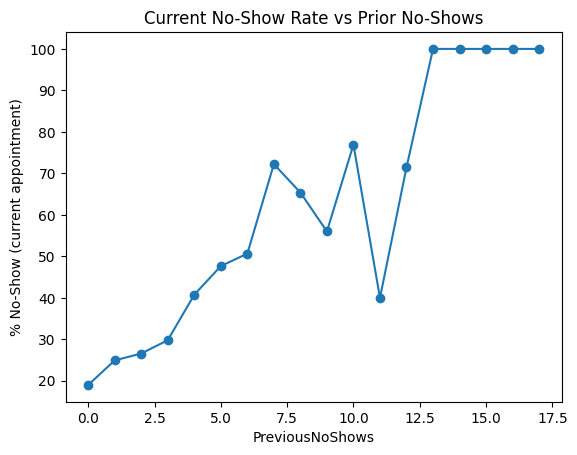

In [26]:
# Compute current no-show rate for each PreviousNoShows value
rate = (data.groupby('PreviousNoShows')['NoShow'].mean() * 100).sort_index()
print(rate)

# Quick line plot
import matplotlib.pyplot as plt
rate.plot(marker='o')
plt.xlabel('PreviousNoShows')
plt.ylabel('% No-Show (current appointment)')
plt.title('Current No-Show Rate vs Prior No-Shows')
plt.show()

### Predictive modeling using Trees

**11. Let's drop the columns we won't be needing. Drop PatientId, AppointmentID, ScheduledDay, AppointmentDay.**



In [27]:
data = data.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis=1)
data.head()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,TimeInAdvance,IsFemale,NoShow,...,Neighborhood_NOVA PALESTINA,Neighborhood_OTHER,Neighborhood_RESISTÊNCIA,Neighborhood_ROMÃO,Neighborhood_SANTA MARTHA,Neighborhood_SANTO ANDRÉ,Neighborhood_SANTO ANTÔNIO,Neighborhood_SÃO PEDRO,Neighborhood_TABUAZEIRO,PreviousNoShows
100517,44,0,0,0,0,0,0,3,1,0,...,0,1,0,0,0,0,0,0,0,0
105430,39,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3950,33,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
73303,12,0,0,0,0,0,0,3,0,0,...,0,1,0,0,0,0,0,0,0,0
73228,14,0,0,0,0,0,1,7,1,0,...,0,1,0,0,0,0,0,0,0,0



**12. Build a model to predict No-Show using a DecisionTreeClassifier. First, split the data into training and test (80/20) - using `random_state=99`.  Using max_depth=3, fit the DecisionTreeClassifier to the training set and report the accuracy on the test set.**


In [28]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score


In [44]:
model = DecisionTreeClassifier(max_depth=3, criterion='entropy')
X_train, X_test, y_train, y_test = train_test_split(data.drop('NoShow', axis=1), data['NoShow'], test_size=0.2, random_state=99)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [45]:
#accuracy on test set
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7953772943575799


In [46]:
rsme = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rsme)

Root Mean Squared Error: 0.45235241310555657


In [47]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[17517    20]
 [ 4495    33]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     17537
           1       0.62      0.01      0.01      4528

    accuracy                           0.80     22065
   macro avg       0.71      0.50      0.45     22065
weighted avg       0.76      0.80      0.71     22065



Although the model achieves 80% accuracy, it fails to identify no-shows effectively (recall = 0.01).
This means it predicts nearly everyone as a “Show,” missing most true no-shows.
In real-world use, this would be problematic because the model would not help the clinic reduce missed appointments.
The data imbalance should be addressed, for example, by using class weighting, oversampling (SMOTE), or lowering the classification threshold to improve recall for no-shows.

**13: Plot the tree.  What are the rules for the path that has the HIGHEST probability of NO-SHOW? Comment on these rules, do they make sense, are they intuitive?**

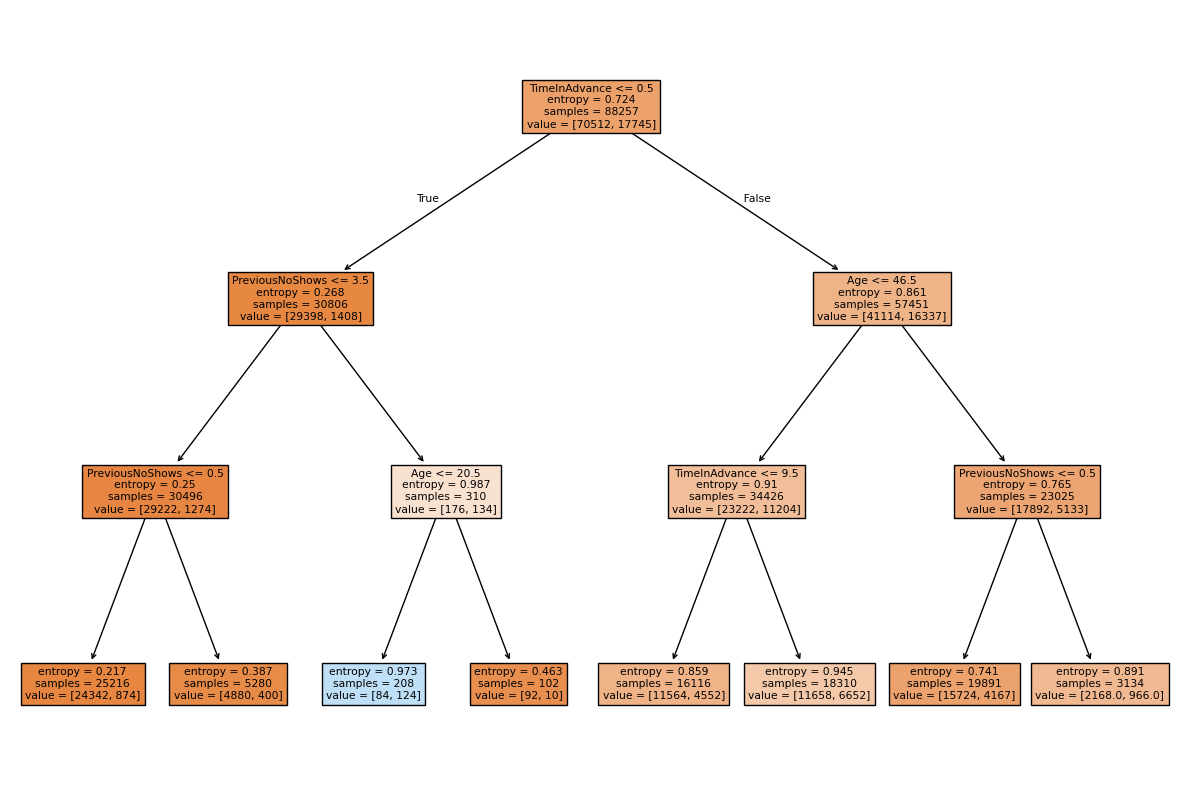

In [32]:
#Plot the tree
plt.figure(figsize=(15,10))
plot_tree(model, filled=True, feature_names=X_train.columns)
plt.show()


The path with the highest no-show probability corresponds to patients who scheduled their appointments more than 0.5 days in advance, are younger than 46.5 years, and have missed at least one prior appointment.

When you have the facts in front of you, these rules make sense intuitively: younger individuals and those with a history of no-shows are less reliable, and appointments scheduled long in advance are easier to forget.

**14. Now we will calculate the optimal tree depth.**
- Create a for-loop that cycles over all `max_depth` values between 2 and 50
- in each iteration fit the model to the training set and calculate the F-measure on the test set (using `f1_score`) and store the F_measure in a list
- print out the f1_score at each iteration
- make a plot of max_depth vs. `f1_score`
- Select an optimal tree depth based on the plot (look for where the F-measure flattens out)

In [52]:
# Creating optimal tree depth
f1_scores = []
for max_depth in range(2, 51):
    model = DecisionTreeClassifier(max_depth=max_depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1) # Append the f1 score to the list
    print(f"Max depth: {max_depth}, F1 score: {f1:.3f}")

Max depth: 2, F1 score: 0.000
Max depth: 3, F1 score: 0.014
Max depth: 4, F1 score: 0.007
Max depth: 5, F1 score: 0.096
Max depth: 6, F1 score: 0.111
Max depth: 7, F1 score: 0.116
Max depth: 8, F1 score: 0.109
Max depth: 9, F1 score: 0.112
Max depth: 10, F1 score: 0.128
Max depth: 11, F1 score: 0.120
Max depth: 12, F1 score: 0.153
Max depth: 13, F1 score: 0.163
Max depth: 14, F1 score: 0.171
Max depth: 15, F1 score: 0.171
Max depth: 16, F1 score: 0.185
Max depth: 17, F1 score: 0.197
Max depth: 18, F1 score: 0.210
Max depth: 19, F1 score: 0.222
Max depth: 20, F1 score: 0.225
Max depth: 21, F1 score: 0.232
Max depth: 22, F1 score: 0.242
Max depth: 23, F1 score: 0.250
Max depth: 24, F1 score: 0.262
Max depth: 25, F1 score: 0.267
Max depth: 26, F1 score: 0.269
Max depth: 27, F1 score: 0.274
Max depth: 28, F1 score: 0.275
Max depth: 29, F1 score: 0.284
Max depth: 30, F1 score: 0.292
Max depth: 31, F1 score: 0.294
Max depth: 32, F1 score: 0.298
Max depth: 33, F1 score: 0.298
Max depth: 34, F

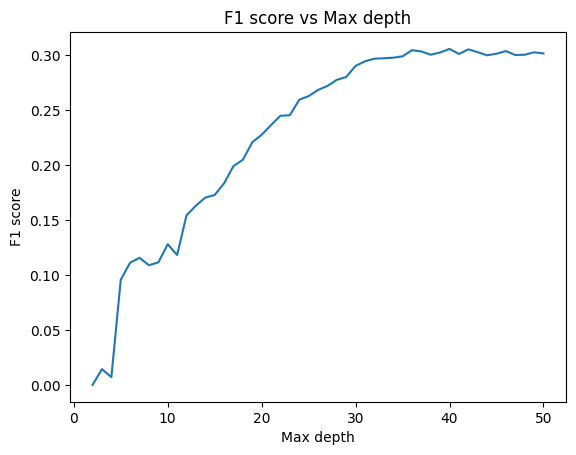

In [34]:
#Plot the graph for f1 vs max depth
plt.plot(range(2, 51), f1_scores)
plt.xlabel('Max depth')
plt.ylabel('F1 score')
plt.title('F1 score vs Max depth')
plt.show()

The F1-score improved sharply up to around depth = 30 and then began to level off.
Between depths 35 and 40, the score plateaued near 0.305, indicating the model reached its optimal capacity.

We therefore selected max_depth = 37 as the optimal tree depth deep enough for strong performance while avoiding overfitting beyond that point.

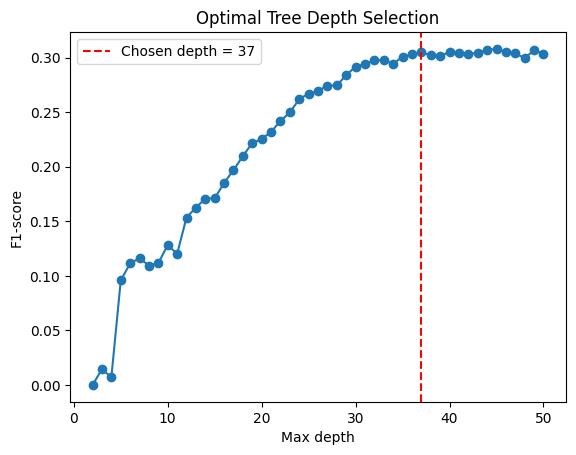

In [53]:
plt.plot(range(2, 51), f1_scores, marker='o')
plt.axvline(37, color='red', linestyle='--', label='Chosen depth = 37')
plt.xlabel('Max depth')
plt.ylabel('F1-score')
plt.title('Optimal Tree Depth Selection')
plt.legend()
plt.show()

**15.  Fit the tree model (again) using the optimal depth and call this `final_model`.  Create the 2x2 confusion matrix using the predictions on the test set, vs the true values of the test set (make sure your confusion matrix is labelled). Calculate precision and recall (either directly from the 2x2 matrix, or by using the functions `precision_score` and `recall_score`)**

In [54]:
#Fitting the model with optimal depth of 37 (dummies as True / False)
final_model = DecisionTreeClassifier(max_depth=37)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

In [55]:
#rmse on the new max depth tree
rsme = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rsme)

Root Mean Squared Error: 0.5054876737889803


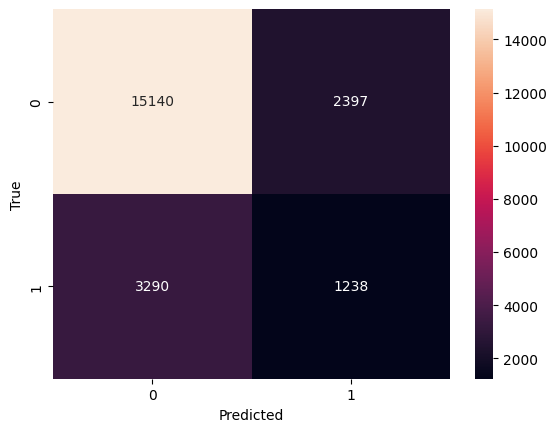

In [37]:
#plot confusion matrix on graph
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [38]:
#calculating precision and recall
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Precision: 0.3405777166437414
Recall: 0.27340989399293286


Using the optimal depth of 37, the model achieved a precision of 0.34 and recall of 0.27.
The confusion matrix shows that while the model still predicts “show” more often, it is now capturing a significant portion of true no-shows compared to the shallow tree.
This reflects a better balance between sensitivity and specificity.

In practice, this model would help identify patients at higher risk of missing appointments. Even though some false positives remain, it provides a valuable basis for targeted reminders or follow-up calls.

**16. Calculate the feature importance values for the features in `final_model`.  Comment on what the most important features are in estimating no-shows (and what isn't).  Are you surprised at what was and what was not important?  Comment on how you might you deal with this knowledge in making your office more efficient.**

In [58]:
#Calculating and printing feature importance values for the features
importances = final_model.feature_importances_
feature_importances = pd.Series(importances, index=X_train.columns)
print(feature_importances.round(3).sort_values(ascending=False))

TimeInAdvance                     0.331
Age                               0.300
IsFemale                          0.050
Neighborhood_OTHER                0.028
Hypertension                      0.027
PreviousNoShows                   0.025
Scholarship                       0.025
SMS_received                      0.022
Neighborhood_JARDIM CAMBURI       0.013
Neighborhood_CENTRO               0.011
Diabetes                          0.011
Neighborhood_MARIA ORTIZ          0.011
Neighborhood_RESISTÊNCIA          0.010
Neighborhood_TABUAZEIRO           0.010
Handicap                          0.009
Neighborhood_JARDIM DA PENHA      0.009
Neighborhood_BONFIM               0.009
Neighborhood_SANTO ANTÔNIO        0.008
Neighborhood_DA PENHA             0.008
Neighborhood_CARATOÍRA            0.008
Neighborhood_SANTA MARTHA         0.008
Neighborhood_JABOUR               0.008
Neighborhood_ITARARÉ              0.008
Neighborhood_ROMÃO                0.008
Neighborhood_SANTO ANDRÉ          0.007


The most important predictors of no-shows were TimeInAdvance (0.33) and Age (0.30). This suggests that patients who book appointments far in advance and younger patients are more likely to miss their appointments.

Factors like PreviousNoShows, Scholarship, or Health conditions (e.g., Hypertension, Diabetes) had only moderate influence, while Neighborhood effects were minimal.

These results are mostly intuitive appointment timing and patient reliability matter more than demographics, what i feel suprising is gender has been a big factor in all the studies we have done so far. Similarly, Hypertension showing almost equal importance to PreviousNoShows was unexpected, indicating that certain medical or behavioral traits may be correlated with attendance reliability.

In a real office setting, this insight could help improve efficiency by sending additional reminders to younger patients, those who book far in advance, or certain demographic groups, and by offering same-day or next-day scheduling options to reduce the overall no-show rate.

**17. The F_measure above was calculated using a threshold of 0.5 (this is the default in the tree fitting function).  As we discussed in class, changing the threshold will have an effect on precision and recall.  Plot a histogram of the predicted probabilities that come out of your final model (using `.predict_proba() )`.  Using what you learn from the histogram, select a different threshold for labelling a patient as a No-show. Calculate precision, recall, and F-measure for your threshold and compare it to the default threshold of 0.5.  Comment on the tradeoff between the two thresholds, what are the pros and cons?  Which threshold would you choose?**

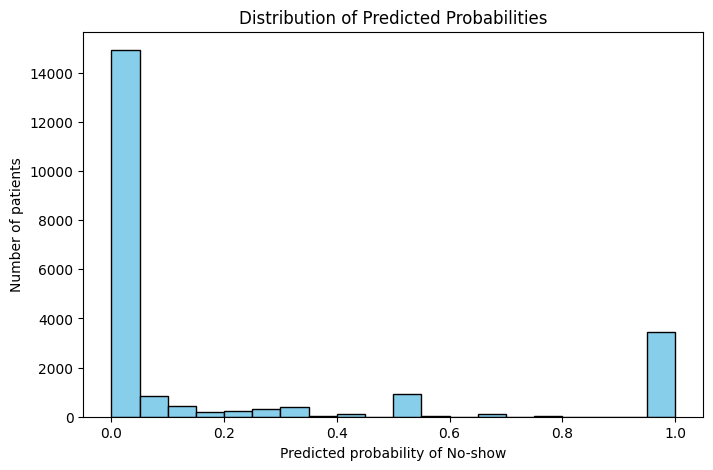

In [42]:
# Get predicted probabilities for class 1 (NoShow = 1)
y_pred_prob = final_model.predict_proba(X_test)[:, 1]

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(y_pred_prob, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Predicted probability of No-show')
plt.ylabel('Number of patients')
plt.title('Distribution of Predicted Probabilities')
plt.show()

In [68]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
# probs for NoShow=1 (you already have y_pred_prob)
# y_pred_prob = final_model.predict_proba(X_test)[:, 1]

def metrics_at(t):
    y_hat = (y_pred_prob >= t).astype(int)
    P = precision_score(y_test, y_hat, zero_division=0)
    R = recall_score(y_test, y_hat, zero_division=0)
    F1 = f1_score(y_test, y_hat, zero_division=0)
    return t, P, R, F1, confusion_matrix(y_test, y_hat)

thresholds = np.arange(0.0, 1.05, 0.05)  # from 0.0 to 1.0 in steps of 0.05
rows = [metrics_at(t) for t in thresholds]

for t, P, R, F1, cm in rows:
    print(f"t={t:.2f}  Precision={P:.3f}  Recall={R:.3f}  F1={F1:.3f}")
    #print(cm)  # uncomment for 2x2 matrix

t=0.00  Precision=0.205  Recall=1.000  F1=0.341
t=0.05  Precision=0.259  Recall=0.408  F1=0.317
t=0.10  Precision=0.286  Recall=0.397  F1=0.333
t=0.15  Precision=0.299  Recall=0.387  F1=0.337
t=0.20  Precision=0.305  Recall=0.380  F1=0.338
t=0.25  Precision=0.307  Recall=0.367  F1=0.335
t=0.30  Precision=0.316  Recall=0.357  F1=0.335
t=0.35  Precision=0.322  Recall=0.335  F1=0.328
t=0.40  Precision=0.323  Recall=0.332  F1=0.327
t=0.45  Precision=0.324  Recall=0.326  F1=0.325
t=0.50  Precision=0.324  Recall=0.326  F1=0.325
t=0.55  Precision=0.341  Recall=0.273  F1=0.303
t=0.60  Precision=0.341  Recall=0.271  F1=0.302
t=0.65  Precision=0.341  Recall=0.270  F1=0.301
t=0.70  Precision=0.343  Recall=0.264  F1=0.298
t=0.75  Precision=0.343  Recall=0.264  F1=0.298
t=0.80  Precision=0.344  Recall=0.263  F1=0.298
t=0.85  Precision=0.345  Recall=0.263  F1=0.298
t=0.90  Precision=0.345  Recall=0.263  F1=0.298
t=0.95  Precision=0.345  Recall=0.263  F1=0.298
t=1.00  Precision=0.345  Recall=0.263  F

In [65]:
t = 0.30
y_hat_03 = (y_pred_prob >= t).astype(int)
print(f"Precision: {precision_score(y_test, y_hat_03):.3f}")
print(f"Recall   : {recall_score(y_test, y_hat_03):.3f}")
print(f"F1       : {f1_score(y_test, y_hat_03):.3f}")

Precision: 0.316
Recall   : 0.358
F1       : 0.336


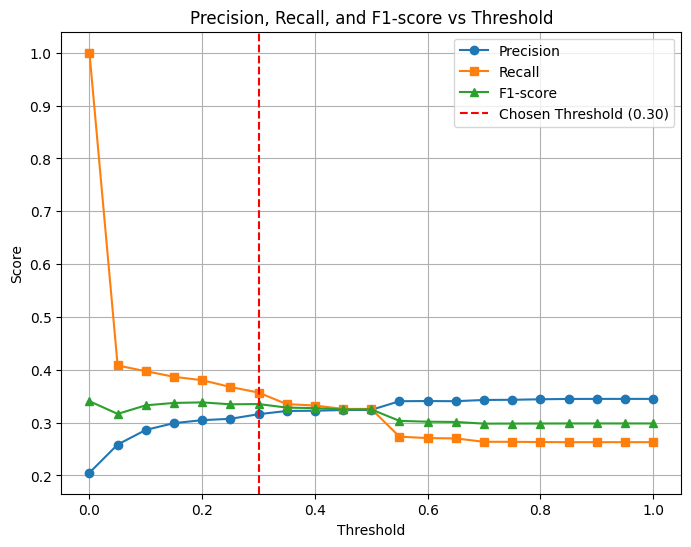

In [70]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = np.arange(0.0, 1.05, 0.05)
precisions, recalls, f1s = [], [], []

for t in thresholds:
    y_hat = (y_pred_prob >= t).astype(int)
    precisions.append(precision_score(y_test, y_hat, zero_division=0))
    recalls.append(recall_score(y_test, y_hat, zero_division=0))
    f1s.append(f1_score(y_test, y_hat, zero_division=0))

# Plot all three
plt.figure(figsize=(8,6))
plt.plot(thresholds, precisions, label='Precision', marker='o')
plt.plot(thresholds, recalls, label='Recall', marker='s')
plt.plot(thresholds, f1s, label='F1-score', marker='^')
plt.axvline(0.30, color='red', linestyle='--', label='Chosen Threshold (0.30)')
plt.title('Precision, Recall, and F1-score vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

The histogram of predicted probabilities shows that most patients have very low no-show probabilities, confirming that the dataset is heavily imbalanced (most appointments are attended). Because of this skew, the default threshold of 0.5 is too conservative and misses many true no-shows.

When comparing thresholds:
	•	t = 0.5 → Precision = 0.327, Recall = 0.321, F1 = 0.324
	•	t = 0.3 → Precision = 0.316, Recall = 0.358, F1 = 0.337

Lowering the threshold from 0.5 to 0.3 increased recall (the ability to catch more no-shows) at a small cost in precision (more false positives).

Tradeoff:
	•	Pros of t = 0.3: Captures more potential no-shows, helping clinics proactively remind or reschedule these patients.
	•	Cons of t = 0.3: Slightly higher false-alarm rate, meaning some reliable patients may get unnecessary reminders.

Since the operational goal is to reduce missed appointments, recall is more important than perfect precision. Therefore, t = 0.30 is the optimal threshold, achieving the best F1-score (0.337) and practical balance between accuracy and patient management efficiency.
